<a href="https://colab.research.google.com/github/aquapathos/BasicAI/blob/master/IAI2_2%E9%9A%8E%E5%B1%A4%E7%9A%84%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E3%83%AA%E3%83%B3%E3%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ライブラリの読み込み

次のセルは実行しても何も起こりませんが、最初に1度必ず実行してください。2度実行する必要はありません。

In [99]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
import numpy as np
import matplotlib.pyplot as plt
!pip -q install japanize-matplotlib
import japanize_matplotlib 

# 階層的クラスタリングの例

![kaisotekiclustering](https://user-images.githubusercontent.com/5820803/128136705-5d2f4f43-a16e-4880-8e30-347b0284fbde.png)

データ 1,2,4,5,9,12,14,15 を最短距離を基準として階層的クラスタリングし、デンドログラムを描画するプログラムは次のように書ける。

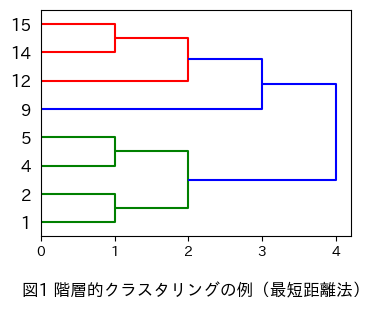

In [156]:
ラベル=[1,2,4,5,9,12,14,15]
データ=[[1],[2],[4],[5],[9],[12],[14],[15]]
階層的クラスタリング結果 = linkage(距離行列,method='single') # 'single' # single:最短距離,  ward:ウォード法、centroid:重心法
plt.figure(num=None, figsize=(4, 3), dpi=100)
デンドログラム = dendrogram(階層的クラスタリング結果,labels=ラベル,orientation='right', truncate_mode='lastp')
plt.title("図1 階層的クラスタリングの例（最短距離法）", y=-0.3)
plt.savefig("fig1")

# 解説

## 階層的クラスタリングの実行
```
階層的クラスタリング結果 = linkage(データ,method='single')
```

この1行だけで階層的クラスタリングが実行できてしまいます。

**method** は
- 'single' : 　最短距離   
- 'complete' : 　最長距離   
- 'ward' :  ウォード法
- 'centroid' ： 重心法
- 'average' : 群平均
- 'median' : メディアン(中央値)法    

が指定できます。

「階層的クラスタリング結果」という変数に何が格納されてのかを確認してみましょう。それには、次のセルを実行します。

In [103]:
階層的クラスタリング結果

array([[ 0.,  1.,  1.,  2.],
       [ 2.,  3.,  1.,  2.],
       [ 6.,  7.,  1.,  2.],
       [ 8.,  9.,  2.,  4.],
       [ 5., 10.,  2.,  3.],
       [ 4., 12.,  3.,  4.],
       [11., 13.,  4.,  8.]])

Nチームで行われるトーナメント試合は、全部で何試合でしょうか？　  
**答**　N-1試合です。優勝チーム以外は必ず１回負けるのですから、当然そうなります。

デンドログラムがトーナメント表のようになることから分かると思いますが、Ｎ個のデータをもとに階層的クラスタリングを実施すると、クラスタへの統合はＮー１回発生します。先の例はデータが８個でしたから、統合は７回です。上の結果の7行は、その７回に対応しています。

```
[0,1,1,2]
```
を例に挙げて、意味を説明します。

最初の０，１は、最初の統合は、０番目のクラスタと１番目のクラスタをまとめる、ということを表しています。

３番目の数字の１は、それらの距離が１であったこと、最後の２は統合されてできたクラスタに含まれるデータの数が全部で２個であることを意味します。

統合されてできた新しいクラスタには、もとからあった０～７番のクラスタ続きで、８番～１４番まで、統合順に連番がつけられます。



# 別の例

同じデータをウォード法でクラスタリングし、デンドログラムの向きを横向きにしてみます。

同じデータを使うので、

```
ラベル=[1,2,4,5,9,12,14,15]
データ=[[1],[2],[4],[5],[9],[12],[14],[15]]
```
は不要です。

- ウォード法を使う　→　**method='ward'**
- デンドログラムを左から右に描く　→  **orientation='right'** と指定



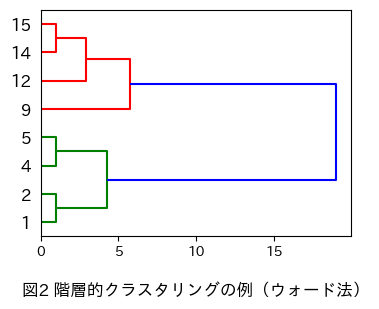

In [154]:
階層的クラスタリング結果 = linkage(距離行列,method='ward') # 'single' # single:最短距離,  ward:ウォード法、centroid:重心法
plt.figure(num=None, figsize=(4, 3), dpi=100)
デンドログラム=dendrogram(階層的クラスタリング結果,labels=ラベル,orientation='right',truncate_mode='lastp')
plt.title("図2 階層的クラスタリングの例（ウォード法）", y=-0.3)
plt.savefig("fig2")

クラスタリング結果を確認しておきます。

In [149]:
階層的クラスタリング結果

array([[ 0.        ,  1.        ,  1.        ,  2.        ],
       [ 2.        ,  3.        ,  1.        ,  2.        ],
       [ 6.        ,  7.        ,  1.        ,  2.        ],
       [ 5.        , 10.        ,  2.88675135,  3.        ],
       [ 8.        ,  9.        ,  4.24264069,  4.        ],
       [ 4.        , 11.        ,  5.71547607,  4.        ],
       [12.        , 13.        , 19.        ,  8.        ]])